In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
import sklearn as skl
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
train_df = pd.read_csv('./datasets/train.csv')

In [3]:
# train_df['Bsmt Qual'] = train_df['Bsmt Qual'].replace(d)
# train_df['Alley'] = train_df['Alley'].replace(d)
# train_df['Bsmt Cond'] = train_df['Bsmt Cond'].replace(d)
# train_df['Bsmt Qual'] = train_df['Bsmt Qual'].replace(d)
# train_df['Bsmt Exposure'] = train_df['Bsmt Exposure'].replace(d)
# train_df['BsmtFin Type 1'] = train_df['BsmtFin Type 1'].replace(d)
# train_df['BsmtFin Type 2'] = train_df['BsmtFin Type 2'].replace(d)
# train_df['Fireplace Qu'] = train_df['Fireplace Qu'].replace(d)
# train_df['Garage Type'] = train_df['Garage Type'].replace(d)
# train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].replace(d)
# train_df['Garage Finish'] = train_df['Garage Finish'].replace(d)
# train_df['Garage Qual'] = train_df['Garage Qual'].replace(d)
# train_df['Garage Cond'] = train_df['Garage Cond'].replace(d)
# train_df['Pool QC'] = train_df['Pool QC'].replace(d)
# train_df['Fence'] = train_df['Fence'].replace(d)
# train_df['Misc Feature'] = train_df['Misc Feature'].replace(d)



In [4]:
# e = {np.nan: 'NA'}
# train_df = train_df.replace(e)


In [5]:
# replace_values = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, 
#      'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1,
#      'Gtl': 3, 'Mod': 2, 'Sev': 1,
#      'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,
#      'Gd': 4, 'Av': 3, 'Mn': 2, 'No':1,
#      'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
#      'N': 0, 'Y': 1,
#      'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1,
#      'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1,
#      'Fin': 3, 'RFn': 2, 'Unf': 1,
#      'Y': 3, 'P': 2, 'N': 1,
#      'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1,
#      }
# train_df = train_df.replace(replace_values)

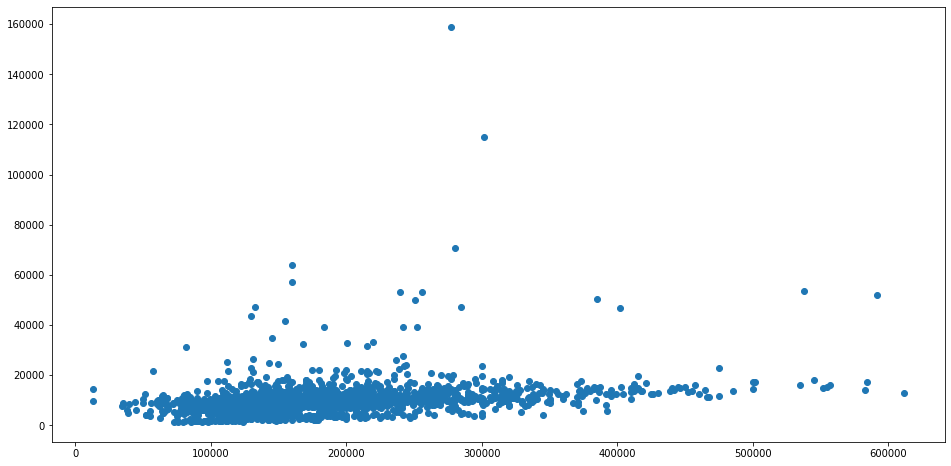

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_df['SalePrice'], train_df['Lot Area'])

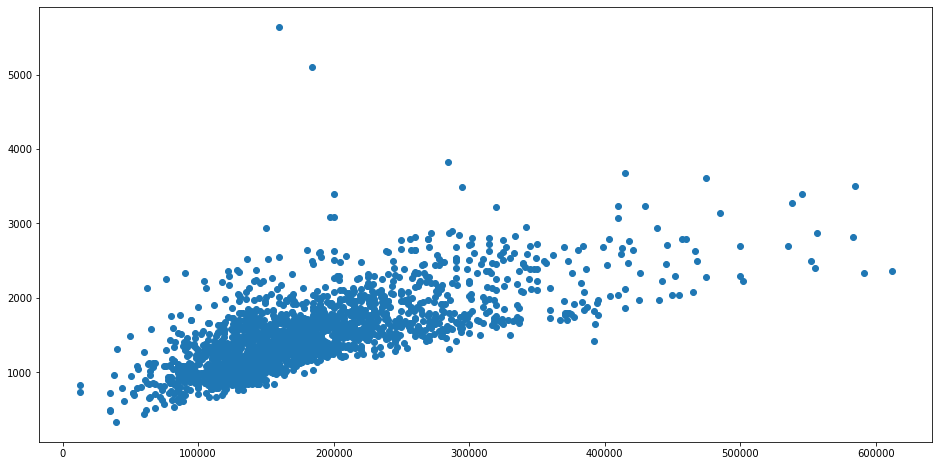

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_df['SalePrice'], train_df['Gr Liv Area'])

In [8]:
# pairplots = sns.pairplot(train_df)

In [9]:
lr = LinearRegression()
X = train_df[['Overall Qual', 'Gr Liv Area']]
y = train_df['SalePrice']
lr.fit(X,y)
lr.intercept_
lr.coef_
y_preds = lr.predict(X)
resids = y - y_preds


In [10]:
from sklearn import metrics

In [11]:
def return_reg_metrics(X, y, k):
    lr = LinearRegression()
    lr.fit(X, y)
    lr.coef_
    lr.intercept_
    preds = lr.predict(X)
    resids = y - preds
    sse = (resids**2).sum()
    null_pred = y.mean()
    null_resids = y - null_pred
    null_sse = (null_resids**2).sum()  
    print("The SSE = " + str((resids**2).sum()))
    print("The MSE = " + str(metrics.mean_squared_error(y, preds)))
    print("The RMSE = " + str((metrics.mean_squared_error(y, preds, squared=False))))
    print("The R2 = " + str((metrics.r2_score(y, preds))))
    n = len(X)
    r2 = 1 - (sse/null_sse)
    r2adj_top = ((1 - r2)*(n - 1))
    r2adj_bot = (n - k - 1)
    r2adj = 1- (r2adj_top / r2adj_bot)
    print("The R2ADJ = " + str((r2adj)))

In [12]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [13]:
# sorted(list(train_df['Total Bsmt SF'].unique()), reverse=False)[0:5]

In [14]:
train_df['Total Bsmt SF'] = train_df['Total Bsmt SF'].replace({np.nan: 0})

In [15]:
X = train_df[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF']]

In [16]:
return_reg_metrics(X, y, 2)

The SSE = 3137252396823.338
The MSE = 1529620866.3204963
The RMSE = 39110.36775997506
The R2 = 0.7563860493967447
The R2ADJ = 0.7561481451481087


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2,)

In [19]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7976790181390747

In [20]:
train_df['Total Bsmt SF'] = train_df['Total Bsmt SF'].replace({np.nan: 0})

In [21]:
train_df = pd.get_dummies(train_df, columns=['Bldg Type'])


In [22]:
train_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,1,0,0,0,0


In [23]:
train_df.drop(columns='Bldg Type_TwnhsE', inplace=True)

In [24]:
X = train_df[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Bedroom AbvGr']]

In [25]:
return_reg_metrics(X, y, 5)

The SSE = 3065168985508.1743
The MSE = 1494475370.79872
The RMSE = 38658.4450126841
The R2 = 0.7619834710837048
The R2ADJ = 0.7614015235802419


In [26]:
X_train.shape

(1538, 3)

In [27]:
y_train.shape

(1538,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2,)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.811297040558028

In [29]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.811297040558028
0.5582616506597888


In [30]:
train_df.dtypes

Id                    int64
PID                   int64
MS SubClass           int64
MS Zoning            object
Lot Frontage        float64
Lot Area              int64
Street               object
Alley                object
Lot Shape            object
Land Contour         object
Utilities            object
Lot Config           object
Land Slope           object
Neighborhood         object
Condition 1          object
Condition 2          object
House Style          object
Overall Qual          int64
Overall Cond          int64
Year Built            int64
Year Remod/Add        int64
Roof Style           object
Roof Matl            object
Exterior 1st         object
Exterior 2nd         object
Mas Vnr Type         object
Mas Vnr Area        float64
Exter Qual           object
Exter Cond           object
Foundation           object
Bsmt Qual            object
Bsmt Cond            object
Bsmt Exposure        object
BsmtFin Type 1       object
BsmtFin SF 1        float64
BsmtFin Type 2      

In [31]:
train_df['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [32]:
train_df['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [33]:
train_df['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [34]:
train_df['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [35]:
# def 

# for n in train_df.columns:
#     column = n
# #     print(column)
#     value_counts = (train_df[column].value_counts())
#     if len(value_counts) < 100:
#         print(column)
#         print(value_counts)
#         print("="*80)
    

In [36]:
train_df.dtypes

Id                    int64
PID                   int64
MS SubClass           int64
MS Zoning            object
Lot Frontage        float64
Lot Area              int64
Street               object
Alley                object
Lot Shape            object
Land Contour         object
Utilities            object
Lot Config           object
Land Slope           object
Neighborhood         object
Condition 1          object
Condition 2          object
House Style          object
Overall Qual          int64
Overall Cond          int64
Year Built            int64
Year Remod/Add        int64
Roof Style           object
Roof Matl            object
Exterior 1st         object
Exterior 2nd         object
Mas Vnr Type         object
Mas Vnr Area        float64
Exter Qual           object
Exter Cond           object
Foundation           object
Bsmt Qual            object
Bsmt Cond            object
Bsmt Exposure        object
BsmtFin Type 1       object
BsmtFin SF 1        float64
BsmtFin Type 2      

In [37]:
list_of_columns = ['MS SubClass',
'MS Zoning',
'Lot Shape',
'Lot Config',
'Neighborhood',
'Condition 1',
'House Style',
'Overall Qual',
'Overall Cond',
'Exterior 1st',
'Exterior 2nd',
'Exter Qual',
'Foundation',
'Bsmt Qual',
'BsmtFin Type 1',
'Heating QC',
'Full Bath',
'Bedroom AbvGr',
'Kitchen Quality',
'TotRms AbvGrd',
'Fireplaces',
'Fireplace Quality',
'Garage Type',
'Garage Finish']

In [38]:
list_of_columns[-1]

'Garage Finish'

In [39]:
def pull_columns(dataframe):
    for n in dataframe.columns:
        column = n
    #     print(column)
        value_counts = (dataframe[column].value_counts())
        if column in list_of_columns:
            print(column)
            print(value_counts)
            print("="*60)




In [40]:
pull_columns(train_df)

MS SubClass
20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64
MS Zoning
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Lot Shape
Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64
Lot Config
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64
Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2


In [41]:
 replace_values = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, 
     'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1,
     'Gtl': 3, 'Mod': 2, 'Sev': 1,
     'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,
     'Gd': 4, 'Av': 3, 'Mn': 2, 'No':1,
     'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
     'N': 0, 'Y': 1,
     'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1,
     'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1,
     'Fin': 3, 'RFn': 2, 'Unf': 1,
     'Y': 3, 'P': 2, 'N': 1,
     'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0, np.nan: 0
     }
# train_df = train_df.replace(replace_values)

In [42]:
train_df['Lot Shape'] = train_df['Lot Shape'].replace(replace_values)
train_df['Exter Qual'] = train_df['Exter Qual'].replace(replace_values)
train_df['Bsmt Qual'] = train_df['Bsmt Qual'].replace(replace_values)
train_df['BsmtFin Typ1 1'] = train_df['BsmtFin Type 1'].replace(replace_values)
train_df['Heating QC'] = train_df['Heating QC'].replace(replace_values)
train_df['Kitchen Qual'] = train_df['Kitchen Qual'].replace(replace_values)
train_df['Fireplace Qu'] = train_df['Fireplace Qu'].replace(replace_values)
train_df['Garage Finish'] = train_df['Garage Finish'].replace(replace_values)

In [43]:
pull_columns(train_df)

MS SubClass
20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64
MS Zoning
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Lot Shape
4    1295
3     692
2      55
1       9
Name: Lot Shape, dtype: int64
Lot Config
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64
Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk 